## SAC Plexus

### Imports

In [1]:
from neuron import h
from RSME_lib.SimParameters import SimulationParameters
from RSME_lib.Simulation import Simulation

### Model initialization

In [2]:
# Parse model specifications from the meta-parameters XML file
simulation_parameters = SimulationParameters(
    "simulation_parameters/plexus_SAC_meta.xml",
    note = 'plexus_SAC') 

# Use the model specification to initiate a new simulation
simulation = Simulation(simulation_parameters)

### Model visualization

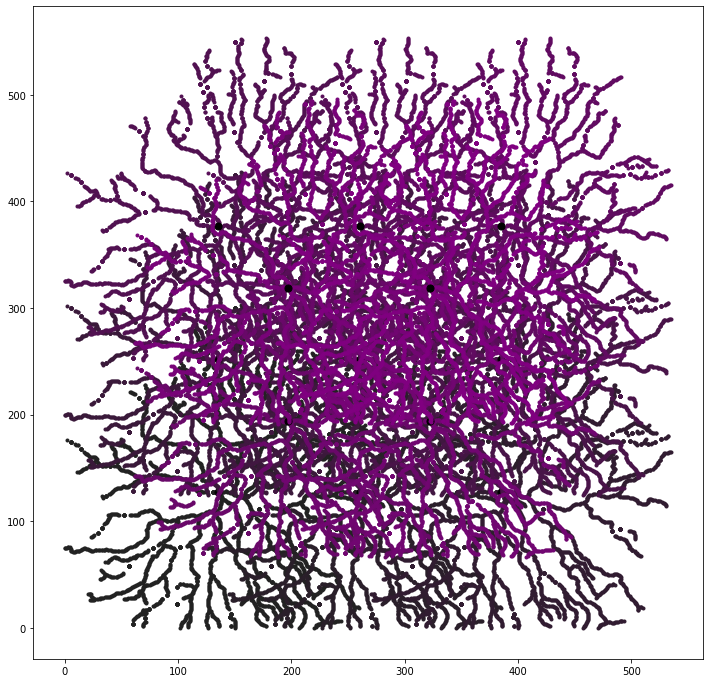

In [3]:
simulation.plot_morphologies()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

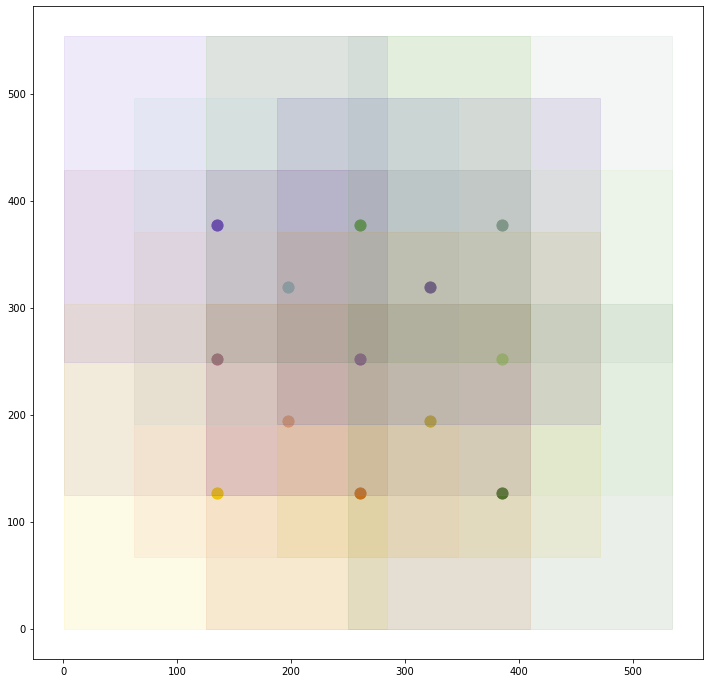

In [4]:
simulation.plot_morphologies(soma_plt = True)

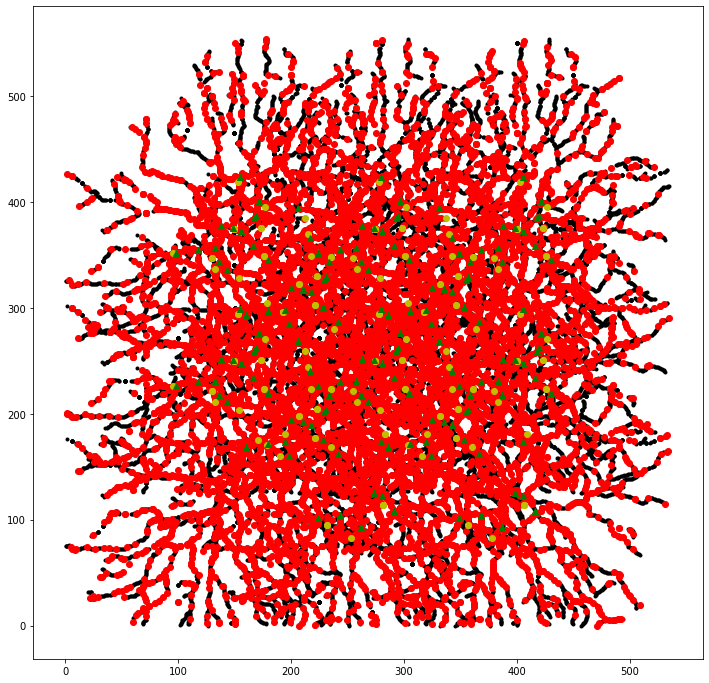

In [5]:
simulation.plot_synapse_distribution()

### Simulate

In [ ]:
simulation.simulate()

### Retrieve and Visualize Results
Resulting figures are generated in the corresponding results folder

In [ ]:
results = simulation.trace_voltages_at_soma()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]:
    plt.plot(results[0]['0'][i]['t'], results[0]['0'][i]['v'], ls='-', label='Expanding stimulus',linewidth=3)
plt.savefig('plexus.jpg', dpi=300)

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML
from neuron import h
import matplotlib as mpl
mpl.rcParams['animation.embed_limit']= 100

xs = []
ys = []
sps = []

for cell in simulation.synapse_dict['light']['0']:
    for i in range(len(simulation.synapse_dict['light']['0'][cell]['x'])):
        x = simulation.synapse_dict['light']['0'][cell]['x'][i]
        y = simulation.synapse_dict['light']['0'][cell]['y'][i]
        syn = simulation.synapse_dict['light']['0'][cell]['BC_syn'][i]
        spike_times = simulation.simulation['spikes']['0'][cell][i]
        for sp_time in spike_times:
            xs.append(x)
            ys.append(y)
            sps.append(sp_time)

df = pd.DataFrame({'x':xs,'y':ys,'sps':sps})
df.index = df.sps
df = df.sort_index()

fig = figure(figsize=(9,9))
ax1 = subplot(1,1,1)
color = sns.color_palette("Paired",14)
for cell in simulation.simulation['cells']['0']['instances']:
    for sec in simulation.simulation['cells']['0']['instances'][cell]['section_dict']['section_list']:
        xs2 =[]
        ys2 =[]
        for i in range(int(sec.n3d())):
            xs2.append(sec.x3d(i))
            ys2.append(sec.y3d(i))
        plot(xs2, ys2,color=color[cell-1])
    plt.axis('equal')

old_sps =scatter([0],[0],marker='o')
def show_spikes(dt):
    global time, old_sps
    title(f't = {time} ms')
    sps = df.loc[time:time+dt]
    old_sps.remove()
    scs = scatter(sps.x,sps.y,marker='o', color='k')
    old_sps = scs
    time +=dt
    return []

time = 0
anim = animation.FuncAnimation(fig, show_spikes, frames=[1] + [4]*200)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='NBEL'), bitrate=1800)
anim.save('plexus_SAC_stimulus.mp4', writer=writer)
HTML(anim.to_jshtml())